<h3><strong>비지도학습 군집화</strong></h3>

k-means(k-평균 군집화)란 주어진 K에 대해 각 샘플과 그 샘플이 속한 군집의 중심까지 거리의 제곱합을 최소화하는 k개의 군집을 찾아내는 것을 의미함.

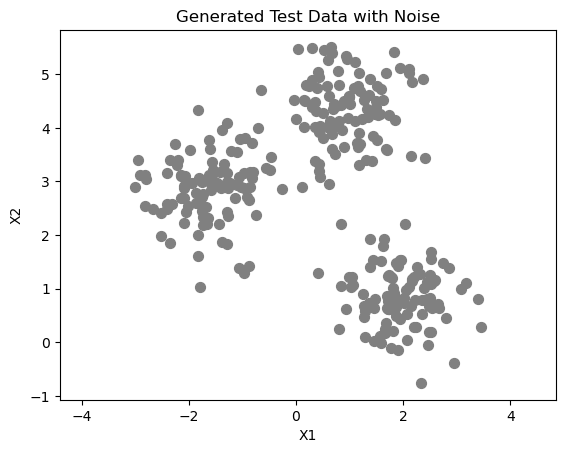

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# 데이터 포인트 300개, 3개의 클러스터, 2차원 데이터를 생성
X, y = make_blobs(n_samples=300, centers=3, cluster_std=0.60, random_state=0)

# 노이즈 추가 (옵션)
noise = np.random.normal(0, 0.05, X.shape)
X += noise

# x축과 y축의 스케일을 동일하게 설정
plt.axis('equal')

# 데이터를 플롯
plt.scatter(X[:, 0], X[:, 1], s=50, c = 'grey')
plt.title("Generated Test Data with Noise")
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()

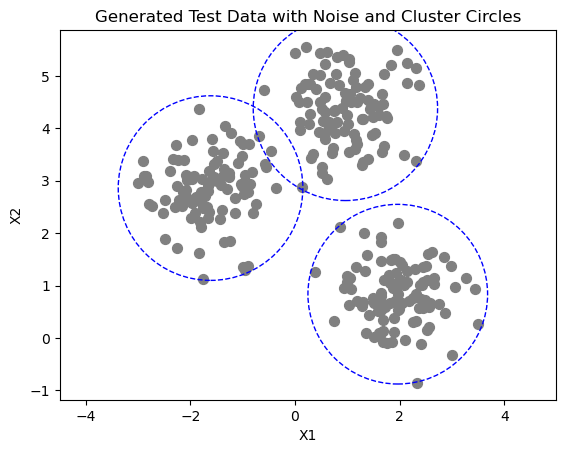

In [2]:
# 데이터 포인트 300개, 3개의 클러스터, 2차원 데이터를 생성
X, y = make_blobs(n_samples=300, centers=3, cluster_std=0.60, random_state=0)

# 노이즈 추가 (옵션)
noise = np.random.normal(0, 0.05, X.shape)
X += noise

# 각 클러스터의 중심을 찾음
centers = {}
for i in np.unique(y):
    centers[i] = np.mean(X[y == i], axis=0)

# 데이터를 플롯
plt.scatter(X[:, 0], X[:, 1], s=50, c='grey')

# x축과 y축의 스케일을 동일하게 설정
plt.axis('equal')

# 각 군집에 대한 원을 그림
for i, center in centers.items():
    # 해당 군집의 데이터 포인트들과 중심 사이의 거리를 계산
    distances = np.linalg.norm(X[y == i] - center, axis=1)

    # 거리의 평균을 반지름으로 설정
    radius = np.mean(distances) + 1

    # 원 그리기
    circle = plt.Circle(center, radius, color='blue', fill=False, linestyle='dashed')
    plt.gca().add_patch(circle)

plt.title("Generated Test Data with Noise and Cluster Circles")
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()

In [3]:
# 군집의 개수 설정
n_clusters = 3

# 데이터 포인트의 개수와 차원 수를 확인
n_samples, n_features = X.shape
print("데이터 포인트 개수, 차원 수", n_samples, n_features)

# 무작위로 초기 중심점 설정
random_indices = np.random.choice(n_samples, n_clusters, replace=False)
initial_centroids = X[random_indices]

print("Initial centroids:", initial_centroids)

데이터 포인트 개수, 차원 수 300 2
Initial centroids: [[-0.59045441  4.73403268]
 [-2.2697442   3.68522252]
 [ 1.03659057  5.26295106]]


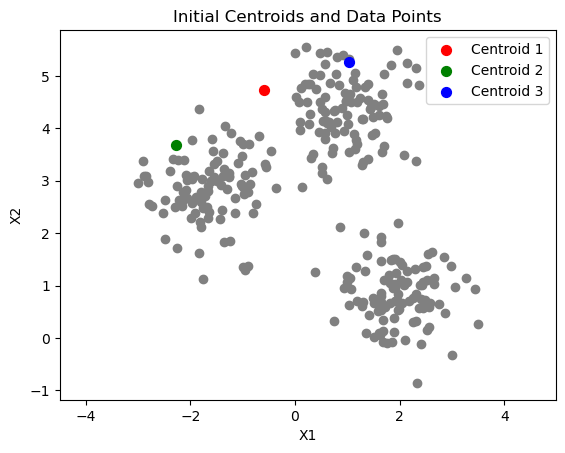

In [4]:
# 데이터 포인트를 회색으로 플롯
plt.scatter(X[:, 0], X[:, 1], c='grey')

# 초기 중심점을 다른 컬러로 플롯
colors = ['r', 'g', 'b']
for i, centroid in enumerate(initial_centroids):
    plt.scatter(centroid[0], centroid[1], c=colors[i], marker='o', s=50, label=f'Centroid {i+1}')

# x축과 y축의 스케일을 동일하게 설정
plt.axis('equal')

# 레이블과 제목 추가
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Initial Centroids and Data Points')
plt.legend()

# 그래프 표시
plt.show()

In [5]:
# [",np.newaxis"]를 붙이는 이유는 X-initial_centroids를 할 경우, shape가 동일하지 않아 에러가 발생하게 됨.
# 하지만 새로운 차원을 만들어 주고, (3,2) (300,3,2)로 동일하게 만들어 주었기 때문에 axis=2로 계산을 진행해야 함.

def euclidean_distances(X, centroids):
    distances = np.sqrt(np.sum((X[:, np.newaxis] - centroids)**2, axis=2))
    return distances

In [6]:
def assign_labels(X, centroids):
    distances = euclidean_distances(X, centroids)
    labels = np.argmin(distances, axis=1)
    return labels

In [7]:
# 각 데이터 포인트에 레이블 할당
# 레이블을 할당하는다는 의미로, 여기에 argmin을 쓴다면 index가 나오게 됨. 이 index의 내용은 가장 작은 거리에 있는 요소를 의미함. 
labels = assign_labels(X, initial_centroids)
# np.argmin(assign_label(X,initial_centroids),axis=1)

print("Initial centroids:", initial_centroids)
print("Assigned labels:", labels)

Initial centroids: [[-0.59045441  4.73403268]
 [-2.2697442   3.68522252]
 [ 1.03659057  5.26295106]]
Assigned labels: [2 0 2 1 1 1 0 0 1 0 0 2 2 2 2 1 2 2 1 0 1 2 0 2 1 1 0 1 2 2 1 2 2 2 2 1 2
 1 2 0 1 2 0 0 2 1 2 1 1 0 1 2 1 1 0 2 2 1 1 2 0 2 2 1 2 1 2 2 2 2 1 0 1 1
 2 2 2 1 2 2 1 2 2 0 2 2 0 1 2 0 1 2 1 2 2 2 0 0 1 0 2 0 2 2 2 2 1 2 2 0 2
 1 2 2 1 1 0 2 1 2 0 1 2 0 2 1 2 2 0 1 1 1 0 1 1 2 1 2 1 1 2 2 2 2 1 1 0 0
 1 0 2 1 2 2 1 1 2 2 2 0 0 2 2 2 1 2 2 2 0 1 2 2 0 2 2 2 2 2 2 2 2 1 2 2 2
 0 2 1 2 1 2 2 2 0 1 2 2 1 2 1 2 1 2 1 2 1 0 1 2 2 2 2 1 0 2 2 0 0 1 2 2 1
 2 2 2 1 1 2 2 0 2 2 2 0 0 1 1 1 0 2 2 1 1 1 1 2 0 1 2 2 2 2 0 0 1 0 0 1 2
 2 1 2 1 1 0 1 2 2 2 2 2 2 2 2 2 2 1 1 0 2 2 2 2 2 1 2 1 1 2 2 1 1 0 2 2 0
 0 0 0 0]


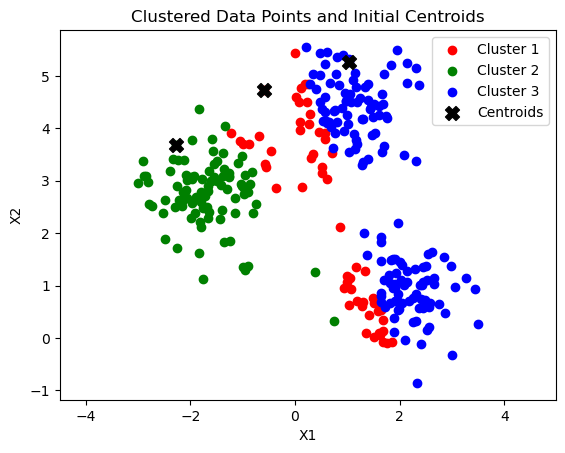

In [8]:
colors = ['r', 'g', 'b']

for i in range(n_clusters):
    cluster_points = X[labels == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], c=colors[i], label=f'Cluster {i+1}')

# 초기 중심점을 검은색 X로 표시
plt.scatter(initial_centroids[:, 0], initial_centroids[:, 1], c='black', marker='X', s=100, label='Centroids')

# x축과 y축의 스케일을 동일하게 설정
plt.axis('equal')

# 레이블과 제목 추가
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Clustered Data Points and Initial Centroids')
plt.legend()

# 그래프 출력
plt.show()

In [9]:
# 이 다음에 해당 점에서의 거리를 다시 한 번 확인해야 함. 이를 통해 업데이트가 되어 더 정확한 점을 찾을 수 있게 됨. 
# 평균값을 기준으로 계속 업데이트 하게 되고, 계속 진행을 하다가 언젠가는 멈추게 됨. 

def update_centroids(X, labels, n_clusters):
    new_centroids = np.zeros((n_clusters, X.shape[1]))
    for i in range(n_clusters):
        cluster_points = X[labels == i]
        if cluster_points.size == 0:
            new_centroids[i] = np.zeros(X.shape[1])
        else:
            new_centroid = np.mean(cluster_points, axis=0)
            new_centroids[i] = new_centroid
    return new_centroids

In [10]:
new_centroids = update_centroids(X, labels, n_clusters)

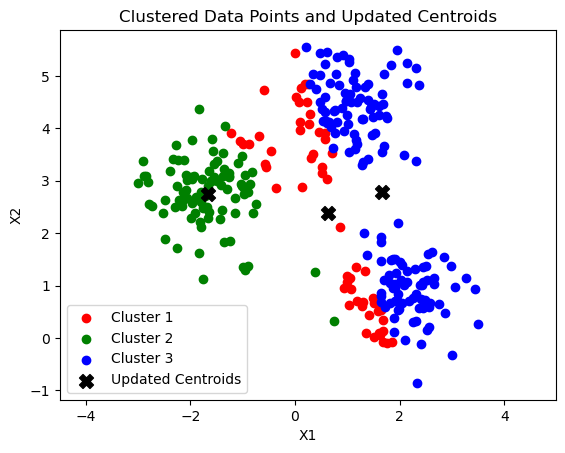

In [11]:
# 플롯 생성
colors = ['r', 'g', 'b']

# 레이블된 데이터 포인트를 플로팅
for i in range(n_clusters):
    cluster_points = X[labels == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], c=colors[i], label=f'Cluster {i+1}')

# 새로운 중심점을 검은색 X로 표시
plt.scatter(new_centroids[:, 0], new_centroids[:, 1], c='black', marker='X', s=100, label='Updated Centroids')

# x축과 y축의 스케일을 동일하게 설정
plt.axis('equal')

# 레이블과 제목 추가
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Clustered Data Points and Updated Centroids')
plt.legend()

# 그래프 출력
plt.show()

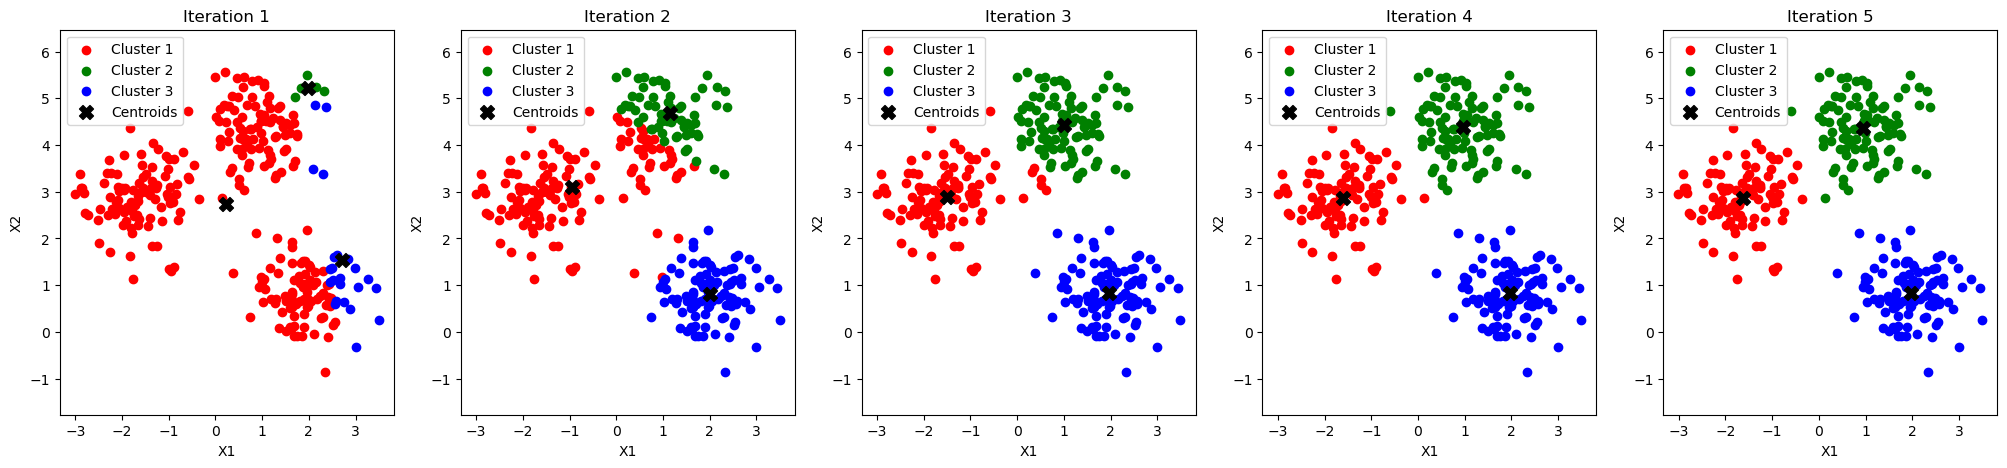

In [12]:
random_indices = np.random.choice(n_samples, n_clusters, replace=False)
centroids = X[random_indices]

# 5번의 반복을 위한 그림 생성
plt.figure(figsize=(25, 5))

for i in range(5):
    # 각 데이터 포인트에 레이블 할당
    labels = assign_labels(X, centroids)

    # 중심점 업데이트
    centroids = update_centroids(X, labels, n_clusters)

    # 플롯 생성
    plt.subplot(1, 5, i + 1)
    colors = ['r', 'g', 'b']

    # 레이블된 데이터 포인트를 플로팅
    for j in range(n_clusters):
        cluster_points = X[labels == j]
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1], c=colors[j], label=f'Cluster {j+1}')

    # 새로운 중심점을 검은색 X로 표시
    plt.scatter(centroids[:, 0], centroids[:, 1], c='black', marker='X', s=100, label='Centroids')

    # x축과 y축의 스케일을 동일하게 설정
    plt.axis('equal')

    # 레이블과 제목 추가
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.title(f'Iteration {i+1}')
    plt.legend()

# 그래프 출력
plt.show()

Converged in 5 iterations.


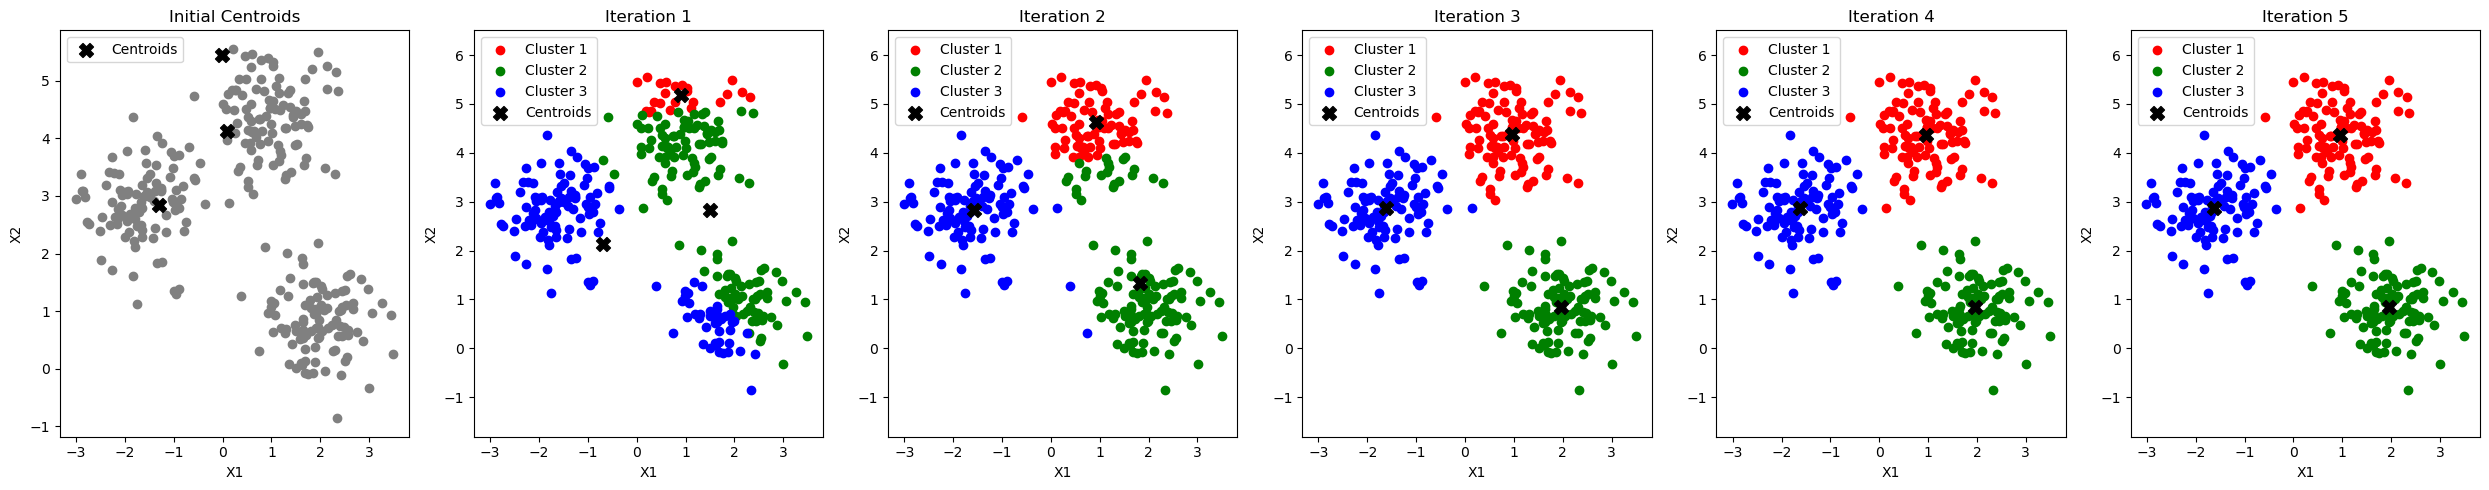

In [14]:
# 무작위로 초기 중심점 설정
random_indices = np.random.choice(n_samples, n_clusters, replace=False)
centroids = X[random_indices]

# 그림 생성
plt.figure(figsize=(25, 5))
plt.subplot(1, 6, 1)
plt.scatter(X[:,0], X[:,1], c='grey')
plt.scatter(centroids[:, 0], centroids[:, 1], c='black', marker='X', s=100, label='Centroids')

plt.xlabel('X1')
plt.ylabel('X2')
plt.title(f'Initial Centroids')
plt.legend()

# 반복 횟수 초기화
iteration = 0

while True:
    iteration += 1
    # 각 데이터 포인트에 레이블 할당
    labels = assign_labels(X, centroids)

    # 중심점 업데이트
    new_centroids = update_centroids(X, labels, n_clusters)

    # 플롯 생성
    plt.subplot(1, 6, iteration + 1)
    colors = ['r', 'g', 'b']

    # 레이블된 데이터 포인트를 플로팅
    for i in range(n_clusters):
        cluster_points = X[labels == i]
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1], c=colors[i], label=f'Cluster {i+1}')

    # 새로운 중심점을 검은색 X로 표시
    plt.scatter(new_centroids[:, 0], new_centroids[:, 1], c='black', marker='X', s=100, label='Centroids')

    # x축과 y축의 스케일을 동일하게 설정
    plt.axis('equal')

    # 레이블과 제목 추가
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.title(f'Iteration {iteration}')
    plt.legend()

    # 중심점이 변화가 없으면 중단
    if np.allclose(centroids, new_centroids):
        print(f"Converged in {iteration} iterations.")
        break

    centroids = new_centroids

    # 최대 5번의 반복으로 제한 (옵션)
    if iteration >= 5:
        print("Max iterations reached.")
        break

# 그래프 출력
plt.tight_layout()
plt.show()

dbscan은 k-means와 달리 밀도를 중심으로 군집화를 진행한다.

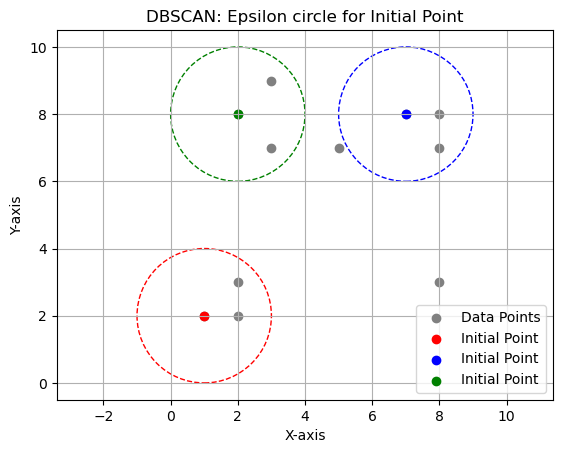

In [15]:
import matplotlib.pyplot as plt
import numpy as np

# 10개의 데이터 포인트 생성
X = np.array([[1, 2], [2, 2], [2, 3], [8, 7],
              [8, 8], [7, 8], [5, 7], [3, 9],
              [2, 8], [3, 7], [8, 3]])

# 초기 포인트 설정 (예: 첫번째 포인트)
initial_point_1 = X[0]
initial_point_2 = X[5]
initial_point_3 = X[8]


# Epsilon 값 설정
epsilon = 2.0

# 데이터 포인트를 Plotting
plt.scatter(X[:, 0], X[:, 1], c='gray', label='Data Points')
plt.scatter(initial_point_1[0], initial_point_1[1], c='red', label='Initial Point')
plt.scatter(initial_point_2[0], initial_point_2[1], c='blue', label='Initial Point')
plt.scatter(initial_point_3[0], initial_point_3[1], c='green', label='Initial Point')

# 초기 포인트에 대한 원 그리기
circle = plt.Circle((initial_point_1[0], initial_point_1[1]), epsilon, color='red', fill=False, linestyle='dashed')
plt.gca().add_patch(circle)

circle = plt.Circle((initial_point_2[0], initial_point_2[1]), epsilon, color='blue', fill=False, linestyle='dashed')
plt.gca().add_patch(circle)

circle = plt.Circle((initial_point_3[0], initial_point_3[1]), epsilon, color='green', fill=False, linestyle='dashed')
plt.gca().add_patch(circle)

# 그래프에 레이블 및 타이틀 추가
plt.axis('equal')
plt.title('DBSCAN: Epsilon circle for Initial Point')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.grid(True)
plt.legend()

# 그래프 출력
plt.show()

# 초록은 borderpoint가 될 것임. 이는 동떨어진 값을 추가하는 경우, 다른 군집과 겹치기에

In [16]:
# 초기 설정값
eps = 2
min_samples = 2  # 최소 2개는 포함을 하고 있어야 함을 의미함.

# 초기 레이블과 방문 기록 설정
n_samples = X.shape[0]
labels = np.zeros(n_samples)
visited = np.zeros(n_samples, dtype=bool)

# 유클리디안 거리를 기반으로 이웃 찾기
def get_neighbors(X, i, eps):
    distances = np.linalg.norm(X - X[i], axis=1)
    neighbors = np.where(distances <= eps)[0]
    return neighbors

In [17]:
i = 0
print(get_neighbors(X, i, eps))

[0 1 2]


In [18]:
# 클러스터 확장 함수
def expand_cluster(X, i, neighbors, cluster_label, visited, labels):
    labels[i] = cluster_label

    j = 0
    while j < len(neighbors):
        neighbor = neighbors[j]

        if not visited[neighbor]:
            visited[neighbor] = True
            new_neighbors = get_neighbors(X, neighbor, eps)

            if len(new_neighbors) >= min_samples:
                neighbors = np.concatenate((neighbors, new_neighbors))

        if labels[neighbor] == 0:
            labels[neighbor] = cluster_label
        j += 1

In [19]:
i = 0
neighbors = get_neighbors(X, i, eps)
cluster_label = 1

expand_cluster(X, i, neighbors, cluster_label, visited, labels)

print(visited)
print(labels)

[ True  True  True False False False False False False False False]
[1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


In [20]:
i = 3
neighbors = get_neighbors(X, i, eps)
cluster_label = 2

expand_cluster(X, i, neighbors, cluster_label, visited, labels)

print(visited)
print(labels)

[ True  True  True  True  True  True False False False False False]
[1. 1. 1. 2. 2. 2. 0. 0. 0. 0. 0.]


0 번째 데이터 포인트
[ True  True  True False False False False False False False False]
[1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
3 번째 데이터 포인트
[ True  True  True  True  True  True False False False False False]
[1. 1. 1. 2. 2. 2. 0. 0. 0. 0. 0.]
6 번째 데이터 포인트
[ True  True  True  True  True  True  True  True  True  True False]
[1. 1. 1. 2. 2. 2. 3. 3. 3. 3. 0.]


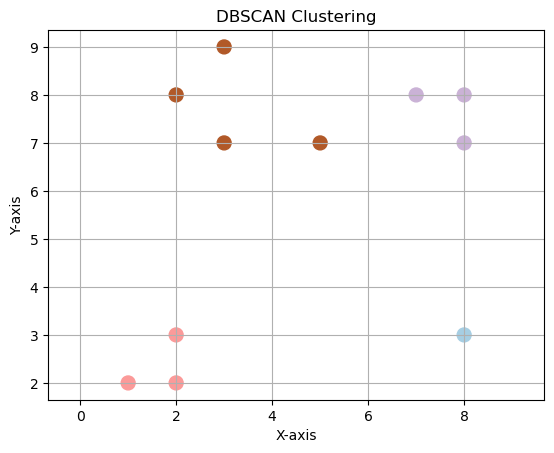

In [21]:
# 초기 레이블과 방문 기록 설정
n_samples = X.shape[0]
labels = np.zeros(n_samples)
visited = np.zeros(n_samples, dtype=bool)

# 클러스터 레이블
cluster_label = 0

# 모든 데이터 포인트를 순회하며 클러스터링
for i in range(n_samples):
    if not visited[i]:
        visited[i] = True
        neighbors = get_neighbors(X, i, eps)

        if len(neighbors) >= min_samples:
            cluster_label += 1
            expand_cluster(X, i, neighbors, cluster_label, visited, labels)

            print("{} 번째 데이터 포인트".format(i))
            print(visited)
            print(labels)

# 결과 Plotting
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='Paired', marker='o', s=100)
plt.title('DBSCAN Clustering')
plt.axis('equal')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.grid(True)
plt.show()

# 0으로 할당된 친구는 거의 noise로 구분됨.
# dbscand의 경우, expand하는 방식으로 움직이기에 밀도에 따라 계속 늘려나가다 더 이상 늘릴 수 없다면 새로운 포인트를 찾음. 